In [1]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import accuracy_score
import pickle

In [2]:
#lire la bd
data = pd.read_csv("datasets/investors.csv") 
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


# 1- Nettoyer ses données 

In [3]:
# affiche toutes les lignes et colonnes
pd.set_option('display.max_columns',data.shape[0]+1)
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
# donne les informations sur la DB
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
#affiche les informations sur la colonne roundB
data['has_roundB'].head()

0    0
1    1
2    0
3    1
4    0
Name: has_roundB, dtype: int64

In [6]:
# afficher certaines donnees statistique
data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [7]:
# permet de definir une nouvelle DB avec les champs qui nous interesse
new_data= data[['age_first_funding_year','age_last_funding_year','relationships', 'funding_rounds','funding_total_usd','milestones',
               'age_first_milestone_year','age_last_milestone_year','state_code.1','city','category_code','has_VC','has_angel','has_roundA',
                'has_roundB','has_roundC','has_roundD','status']]

new_data.head()

,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,age_first_milestone_year,age_last_milestone_year,state_code.1,city,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,status
0,2.2493,3.0027,3,3,375000,3,4.6685,6.7041,CA,San Diego,music,0,1,0,0,0,0,acquired
1,5.1260,9.9973,9,4,40100000,1,7.0055,7.0055,CA,Los Gatos,enterprise,1,0,0,1,1,1,acquired
2,1.0329,1.0329,5,1,2600000,2,1.4575,2.2055,CA,San Diego,web,0,0,1,0,0,0,acquired
3,3.1315,5.3151,5,3,40000000,1,6.0027,6.0027,CA,Cupertino,software,0,0,0,1,1,1,acquired
4,0.0000,1.6685,2,2,1300000,1,0.0384,0.0384,CA,San Francisco,games_video,1,1,0,0,0,0,closed


In [8]:
# affiche les infos sur la DB
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_first_funding_year    923 non-null    float64
 1   age_last_funding_year     923 non-null    float64
 2   relationships             923 non-null    int64  
 3   funding_rounds            923 non-null    int64  
 4   funding_total_usd         923 non-null    int64  
 5   milestones                923 non-null    int64  
 6   age_first_milestone_year  771 non-null    float64
 7   age_last_milestone_year   771 non-null    float64
 8   state_code.1              922 non-null    object 
 9   city                      923 non-null    object 
 10  category_code             923 non-null    object 
 11  has_VC                    923 non-null    int64  
 12  has_angel                 923 non-null    int64  
 13  has_roundA                923 non-null    int64  
 14  has_roundB

In [9]:
# affiche les differents champs de la coluonne category
new_data['category_code'].unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

In [10]:
# permet de changer le nom d'une colonne
new_data = new_data.rename(columns={"category_code":"industry_type"})
new_data = new_data.rename(columns={"state_code.1":"state_code"})

In [11]:
# affiche la nouvelle DB
new_data.head()

,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,age_first_milestone_year,age_last_milestone_year,state_code,city,industry_type,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,status
0,2.2493,3.0027,3,3,375000,3,4.6685,6.7041,CA,San Diego,music,0,1,0,0,0,0,acquired
1,5.1260,9.9973,9,4,40100000,1,7.0055,7.0055,CA,Los Gatos,enterprise,1,0,0,1,1,1,acquired
2,1.0329,1.0329,5,1,2600000,2,1.4575,2.2055,CA,San Diego,web,0,0,1,0,0,0,acquired
3,3.1315,5.3151,5,3,40000000,1,6.0027,6.0027,CA,Cupertino,software,0,0,0,1,1,1,acquired
4,0.0000,1.6685,2,2,1300000,1,0.0384,0.0384,CA,San Francisco,games_video,1,1,0,0,0,0,closed


In [12]:
# affiche le montant max en usd de la colonne fundingtotal
new_data['funding_total_usd'].max()

5700000000

In [13]:
# afficher le nombre de valeures manquantes par colone (NAN)
new_data.isnull().sum().sort_values(ascending=False)

age_first_milestone_year    152
age_last_milestone_year     152
state_code                    1
age_first_funding_year        0
has_VC                        0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
city                          0
industry_type                 0
age_last_funding_year         0
milestones                    0
funding_total_usd             0
funding_rounds                0
relationships                 0
status                        0
dtype: int64

In [14]:
mean_afmy = new_data['age_first_milestone_year'].mean()
mean_afmy

3.055353047989626

In [15]:
mean_almy = new_data['age_last_milestone_year'].mean()
mean_almy

4.754422568093388

In [16]:
new_data['state_code'].fillna(method='bfill', inplace=True)
new_data['age_first_milestone_year'].fillna(value = mean_afmy, inplace=True)
new_data['age_last_milestone_year'].fillna(value = mean_almy, inplace=True)

In [17]:
new_data.isnull().sum().sort_values(ascending=False)

age_first_funding_year      0
age_last_funding_year       0
has_roundD                  0
has_roundC                  0
has_roundB                  0
has_roundA                  0
has_angel                   0
has_VC                      0
industry_type               0
city                        0
state_code                  0
age_last_milestone_year     0
age_first_milestone_year    0
milestones                  0
funding_total_usd           0
funding_rounds              0
relationships               0
status                      0
dtype: int64

In [18]:
num_data = new_data.drop(['state_code', 'city', 'industry_type', 'status'], axis=1) 
num_data.head()

,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,age_first_milestone_year,age_last_milestone_year,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD
0,2.2493,3.0027,3,3,375000,3,4.6685,6.7041,0,1,0,0,0,0
1,5.1260,9.9973,9,4,40100000,1,7.0055,7.0055,1,0,0,1,1,1
2,1.0329,1.0329,5,1,2600000,2,1.4575,2.2055,0,0,1,0,0,0
3,3.1315,5.3151,5,3,40000000,1,6.0027,6.0027,0,0,0,1,1,1
4,0.0000,1.6685,2,2,1300000,1,0.0384,0.0384,1,1,0,0,0,0


In [19]:
num_data[num_data < 0] = 0 
num_data.head()

,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,age_first_milestone_year,age_last_milestone_year,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD
0,2.2493,3.0027,3,3,375000,3,4.6685,6.7041,0,1,0,0,0,0
1,5.1260,9.9973,9,4,40100000,1,7.0055,7.0055,1,0,0,1,1,1
2,1.0329,1.0329,5,1,2600000,2,1.4575,2.2055,0,0,1,0,0,0
3,3.1315,5.3151,5,3,40000000,1,6.0027,6.0027,0,0,0,1,1,1
4,0.0000,1.6685,2,2,1300000,1,0.0384,0.0384,1,1,0,0,0,0


In [20]:
cat_data = new_data[['state_code', 'city', 'industry_type', 'status']]
cat_data.head()

,state_code,city,industry_type,status
0,CA,San Diego,music,acquired
1,CA,Los Gatos,enterprise,acquired
2,CA,San Diego,web,acquired
3,CA,Cupertino,software,acquired
4,CA,San Francisco,games_video,closed


In [21]:
cat_data=pd.DataFrame(cat_data) #ici c'est la transformation de la liste en une bd
num_data=pd.DataFrame(num_data)
cat_data.head()

,state_code,city,industry_type,status
0,CA,San Diego,music,acquired
1,CA,Los Gatos,enterprise,acquired
2,CA,San Diego,web,acquired
3,CA,Cupertino,software,acquired
4,CA,San Francisco,games_video,closed


In [22]:
target_value={'acquired':1,'closed':0}
target=cat_data['status'] # creer la colone target
cat_data.drop('status',axis=1,inplace=True)# supprimer l'ancienne colone status
target=target.map(target_value)
target.head()

0    1
1    1
2    1
3    1
4    0
Name: status, dtype: int64

In [23]:
# remplacer le reste des variables string par des valeurs num 0 , 1, 2...
# Nous pourions aussi le faire manuellement comme celle da la colone target si haut
# Mais nous avons prefere utiliser la fonction le.fit_transform
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data.head()

,state_code,city,industry_type
0,2,173,19
1,2,108,8
2,2,173,34
3,2,55,30
4,2,174,11


In [24]:
data_final=pd.concat([num_data, cat_data, target],axis=1)
data_final.head()

,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,age_first_milestone_year,age_last_milestone_year,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,state_code,city,industry_type,status
0,2.2493,3.0027,3,3,375000,3,4.6685,6.7041,0,1,0,0,0,0,2,173,19,1
1,5.1260,9.9973,9,4,40100000,1,7.0055,7.0055,1,0,0,1,1,1,2,108,8,1
2,1.0329,1.0329,5,1,2600000,2,1.4575,2.2055,0,0,1,0,0,0,2,173,34,1
3,3.1315,5.3151,5,3,40000000,1,6.0027,6.0027,0,0,0,1,1,1,2,55,30,1
4,0.0000,1.6685,2,2,1300000,1,0.0384,0.0384,1,1,0,0,0,0,2,174,11,0


# 2- Analyse exploratoire

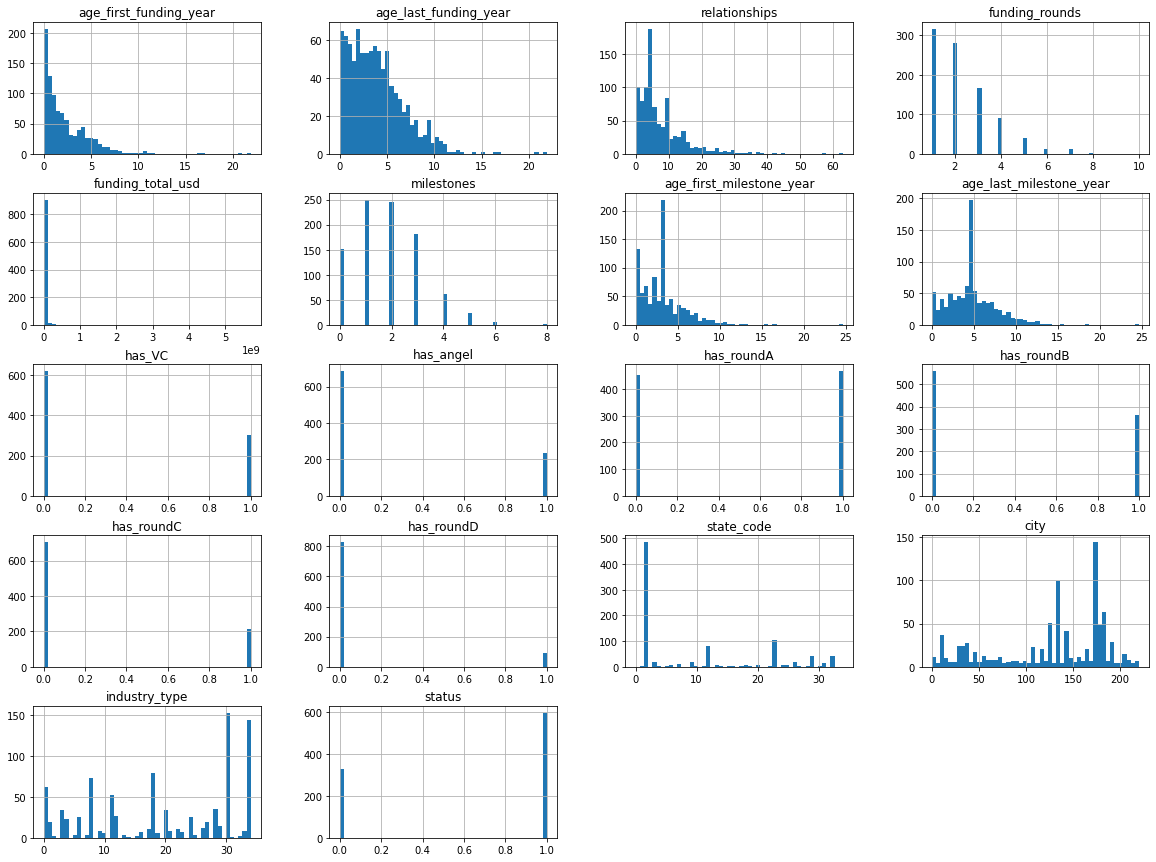

In [25]:
data_final.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

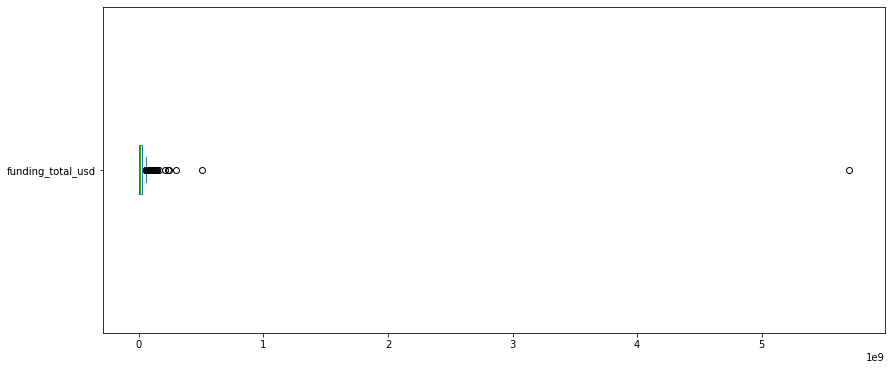

In [26]:
data_final['funding_total_usd'].plot(kind='box', vert=False,figsize=(14,6))

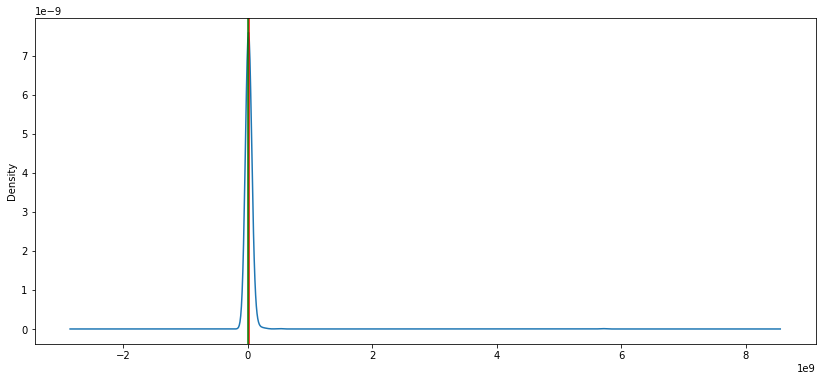

In [27]:
ax = data_final['funding_total_usd'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(data_final['funding_total_usd'].mean(), color='red')
ax.axvline(data_final['funding_total_usd'].median(), color='green')

<AxesSubplot:ylabel='milestones'>

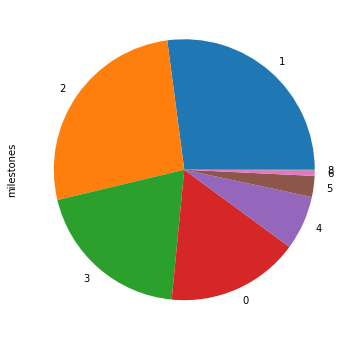

In [28]:
data_final['milestones'].value_counts().plot(kind='pie',figsize=(14,6))

<AxesSubplot:ylabel='Frequency'>

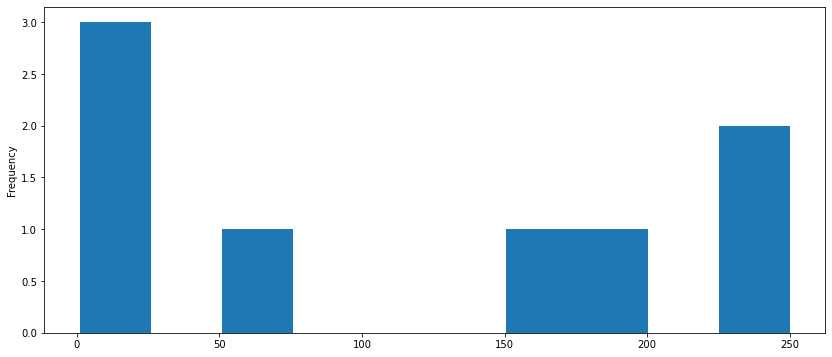

In [29]:
data_final['milestones'].value_counts().plot(kind='hist',figsize=(14,6))

In [30]:
corr = data_final.corr()

corr

,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,age_first_milestone_year,age_last_milestone_year,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,state_code,city,industry_type,status
age_first_funding_year,1.000000,0.755921,-0.195097,-0.161961,0.045977,-0.304118,0.507185,0.393348,0.171521,-0.342829,-0.307696,-0.067114,0.031228,0.119491,-0.038466,-0.039796,0.000595,-0.092028
age_last_funding_year,0.755921,1.000000,0.071947,0.386045,0.117200,-0.125861,0.629617,0.568442,0.353333,-0.353762,-0.106063,0.257885,0.318907,0.314535,-0.072406,-0.074799,-0.049277,0.067870
relationships,-0.195097,0.071947,1.000000,0.358883,0.093790,0.513835,0.234736,0.326917,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,-0.091086,0.053883,-0.072214,0.360434
funding_rounds,-0.161961,0.386045,0.358883,1.000000,0.115800,0.230162,0.179057,0.238229,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,-0.042807,-0.077718,-0.093349,0.206049
funding_total_usd,0.045977,0.117200,0.093790,0.115800,1.000000,0.012056,0.065103,0.094548,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.051226,-0.027347,-0.023858,0.040176
milestones,-0.304118,-0.125861,0.513835,0.230162,0.012056,1.000000,-0.042625,0.262698,-0.093338,0.128255,0.319986,0.195162,0.085329,0.020663,-0.019175,0.012072,-0.002701,0.328260
age_first_milestone_year,0.507185,0.629617,0.234736,0.179057,0.065103,-0.042625,1.000000,0.787439,0.118405,-0.264145,0.000194,0.173566,0.190625,0.242597,-0.081655,-0.000619,0.027697,0.144029
age_last_milestone_year,0.393348,0.568442,0.326917,0.238229,0.094548,0.262698,0.787439,1.000000,0.085995,-0.240539,0.102111,0.242923,0.254472,0.238103,-0.074222,0.004544,0.053354,0.229767
has_VC,0.171521,0.353333,-0.028938,0.334832,0.010060,-0.093338,0.118405,0.085995,1.000000,-0.204968,-0.198532,-0.004980,0.059520,0.023128,0.018315,-0.081387,-0.042492,-0.056515
has_angel,-0.342829,-0.353762,-0.060625,0.010606,-0.059650,0.128255,-0.264145,-0.240539,-0.204968,1.000000,-0.141326,-0.291194,-0.251462,-0.128046,0.077372,0.068128,0.029467,-0.072840


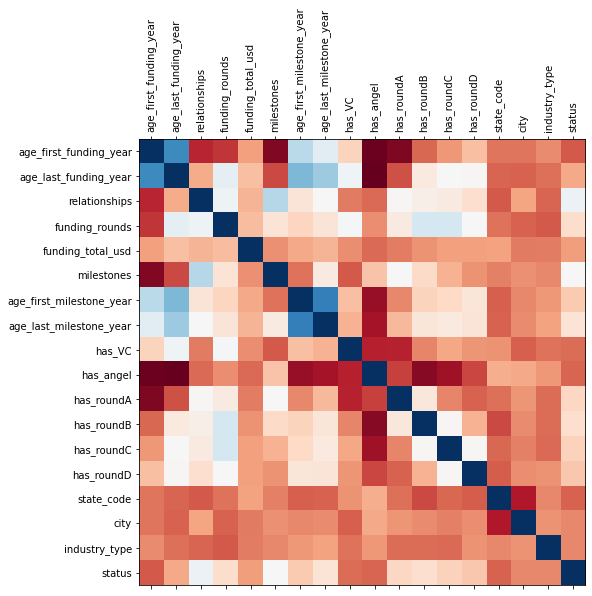

In [31]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<AxesSubplot:xlabel='funding_rounds', ylabel='has_VC'>

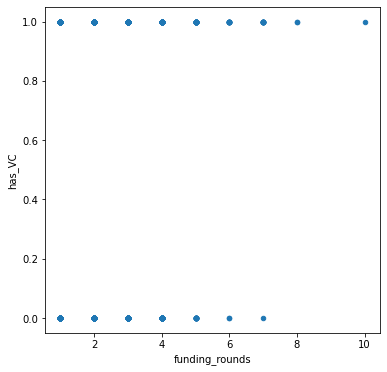

In [32]:
data_final.plot(kind='scatter', x='funding_rounds', y='has_VC', figsize=(6,6))

# 3- Appliquer le model

In [33]:
X = data_final.drop("status",axis=1)
y = data_final["status"]

In [34]:
smote = SMOTE()
X_sm,y_sm = smote.fit_resample(X.astype(float),y)

In [35]:
# nous allons diviser notre BD en une bd d'emtrainement et une bd de test

X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

print('X_train size:',X_train.shape)
print('X_test size:',X_test.shape)
print('y_train size:',y_train.shape)
print('y_test size:',y_test.shape)

X_train size: (835, 17)
X_test size: (359, 17)
y_train size: (835,)
y_test size: (359,)


In [36]:
# Feature Scalling

scaler = MinMaxScaler()

#fit the training datatset
scaler.fit(X_train)

MinMaxScaler()

In [37]:
# DecisionTreeClassifier algorithim

Classifier = DecisionTreeClassifier()

Classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [38]:
# Evaluate the performance of the algorithm
Classifier.score(X_train, y_train)

1.0

In [39]:
print('the accuracy of the training set is',Classifier.score(X_train, y_train, sample_weight=None)*100,'%')
print('the accuracy of the testing set is',Classifier.score(X_test, y_test, sample_weight=None)*100,'%')

the accuracy of the training set is 100.0 %
the accuracy of the testing set is 75.76601671309191 %


In [40]:
# Le meilleur model c'est LogisticRegression. Nous allons l'appliquer seul maintenant
# appliquer la regression logistique sur notre bd

Classifier=DecisionTreeClassifier()
Classifier.fit(X,y)

DecisionTreeClassifier()

In [41]:
# Enregistrer le model
pickle.dump(Classifier,open('model_investor.pkl','wb'))